In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
stock_returns = pd.read_csv("../../Data/StockReturns.csv")

esg_scores = np.array([
    36.6, 17.9, 18, 
    18, 23.2, 29.2, 
    15.7, 25.4, 25.6, # Del this
    19.8, 13.8, 18.1, 
    17.3, 14, 12.3, 
    21.2, 26.8, 24.9
])

# Defining stock pool
ticker_df =  pd.DataFrame({
    "Petroleum": ["EQNR.OL", "SUBC.OL", "BWO.OL"],
    "Food": ["ORK.OL", "MOWI.OL", "LSG.OL"],
    "Materials": ["NHY.OL", "YAR.OL", "RECSI.OL"],
    "Technologies": ["TEL.OL", "NOD.OL", "ATEA.OL"],
    "Financial": ["STB.OL", "DNB.OL", "AKER.OL"],
    "Shipping":["SNI.OL", "BELCO.OL", "ODF.OL"]
})

stock_cols = stock_returns.columns

train = stock_returns.iloc[:int(len(stock_returns)*0.9)]
valid = stock_returns.iloc[int(len(stock_returns)*0.8):int(len(stock_returns)*0.9)]
test = stock_returns.iloc[int(len(stock_returns)*0.9):]

In [14]:
train.iloc[301, 3] = 0
train.to_csv("../../Data/StockReturns.csv", index=False)


C:\Users\Jakob\AppData\Local\Temp\ipykernel_47256\1953846624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.iloc[301, 3] = 0


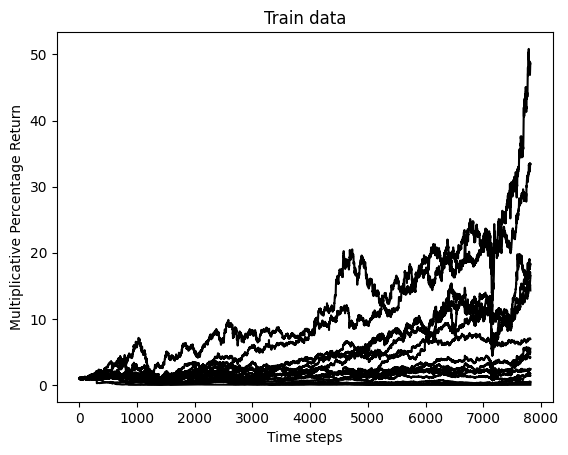

In [15]:
plt.plot(np.cumprod(train+1), color="black", label="Securities")
plt.xlabel("Time steps")
plt.ylabel("Multiplicative Percentage Return")
plt.title("Train data")
plt.show()

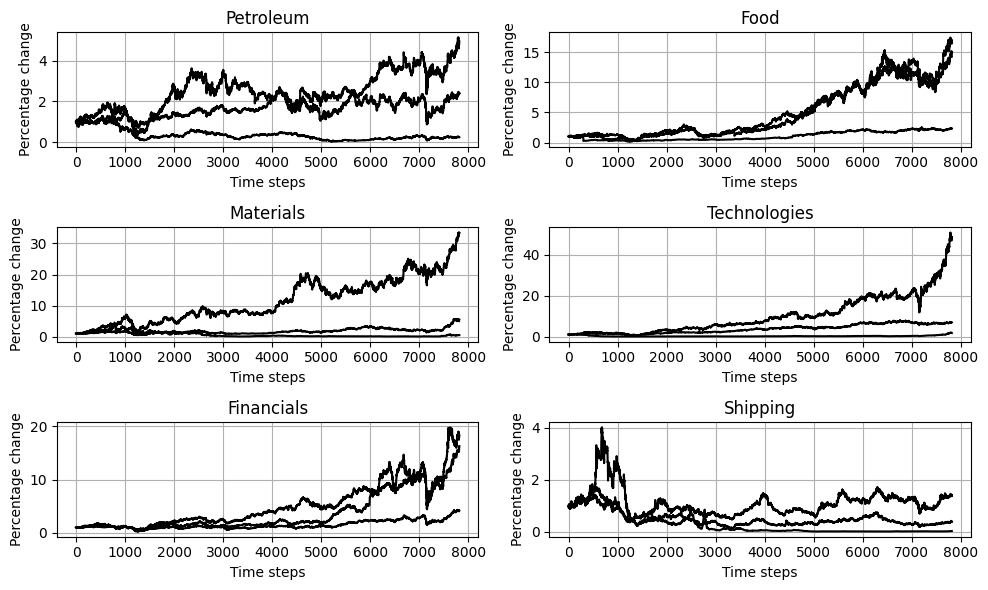

In [16]:
def z_score(arr):
    answer = (arr-arr.mean()) / arr.std()
    return answer

sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(train.iloc[:,(i*6):3+(i*6)]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(train.iloc[:, 3+i*6:(i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


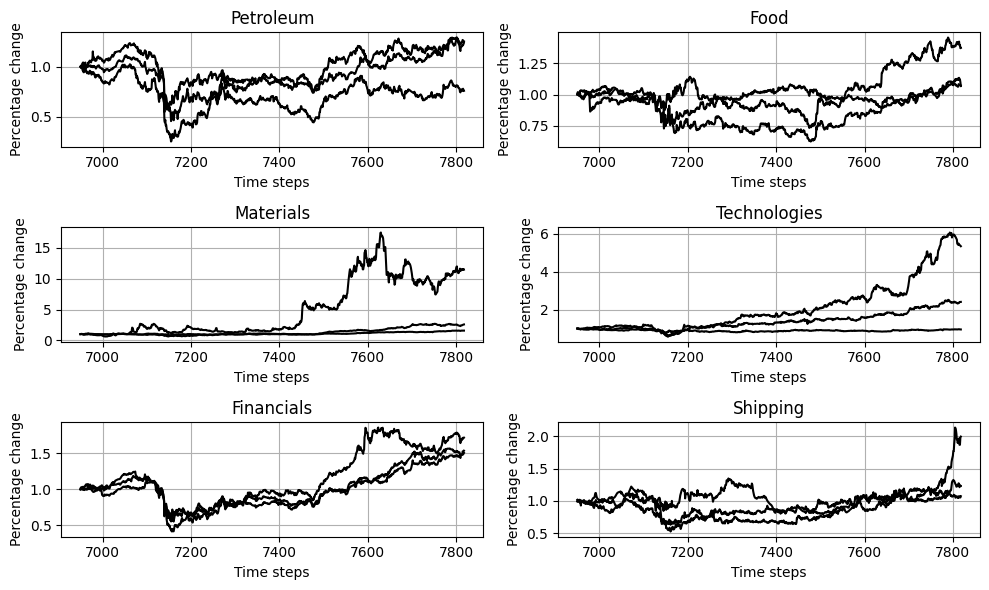

In [17]:
sector_names = [["Petroleum", "Food"],["Materials", "Technologies"], ["Financials", "Shipping"]]
fig, ax = plt.subplots(3,2, figsize=(10,6))
for i in range(0,3,1):
    ax[i,0].plot((np.cumprod(valid.iloc[:,(i*6):3+(i*6)]+1)), color="black", alpha=1)
    ax[i,1].plot((np.cumprod(valid.iloc[:, 3+i*6:(i+1)*6]+1)), color="black", alpha=1)

    ax[i,0].set_title(sector_names[i][0])
    ax[i,1].set_title(sector_names[i][1])

    ax[i,0].set_xlabel("Time steps")
    ax[i,1].set_xlabel("Time steps")

    ax[i,0].set_ylabel("Percentage change")    
    ax[i,1].set_ylabel("Percentage change")
    
    ax[i,0].grid()
    ax[i,1].grid()
fig.tight_layout()


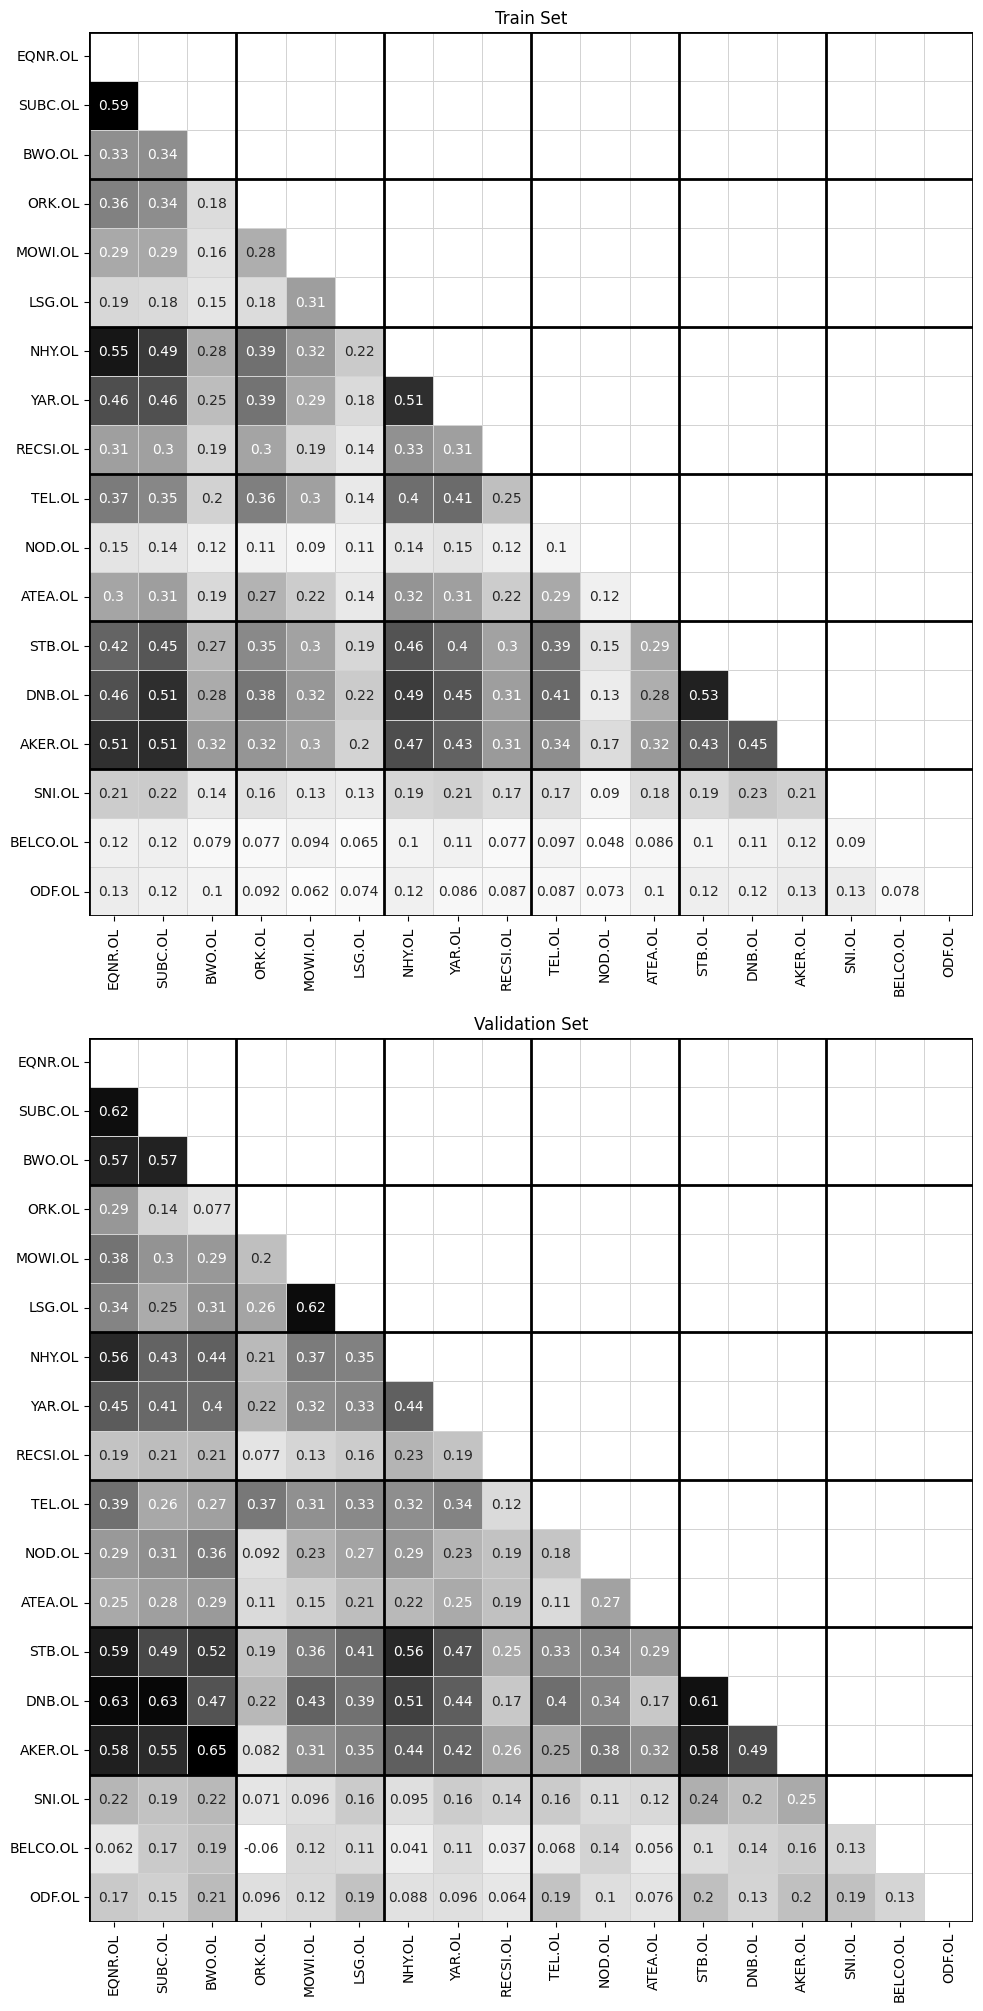

In [18]:
# Create the figure and 3 horizontal subplots
fig, axes = plt.subplots(2,1, figsize=(10, 20), constrained_layout=True)

datasets = [train, valid]
titles = ['Train Set', 'Validation Set']

for i, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
    # Create upper triangle mask
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    
    # Plot heatmap
    sns.heatmap(data.corr(),
                mask=mask,
                annot=True,
                cmap="Greys",
                cbar=(i==2),
                ax=ax,
                square=True,
                linewidths=0.5,
                linecolor='lightgray')

    # Grid lines every 3 rows/cols
    for i in range(0, data.shape[0] + 1,3):
        ax.axhline(i, color='black', linewidth=2)
        ax.axvline(i, color='black', linewidth=2)
    
    ax.set_title(title)

plt.show()


In [19]:
train_valid = pd.concat([train, valid])

In [20]:
train_valid.head(2)

,EQNR.OL,SUBC.OL,BWO.OL,ORK.OL,MOWI.OL,LSG.OL,NHY.OL,YAR.OL,RECSI.OL,TEL.OL,NOD.OL,ATEA.OL,STB.OL,DNB.OL,AKER.OL,SNI.OL,BELCO.OL,ODF.OL
0,0.011268,-0.002591,-0.004545,0.010345,0.028443,0.050847,0.018018,0.006061,-0.01108,-0.006667,-0.021739,0.014493,0.015686,0.016234,0.04644,-0.02627,-0.036885,1.418199e-07
1,0.011268,-0.002591,-0.004545,0.010345,0.028443,0.050847,0.018018,0.006061,-0.01108,-0.006667,-0.021739,0.014493,0.015686,0.016234,0.04644,-0.02627,-0.036885,1.418199e-07


In [21]:
np.round(train_valid.iloc[:,:6].describe(),5)

,EQNR.OL,SUBC.OL,BWO.OL,ORK.OL,MOWI.OL,LSG.OL
count,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000
mean,0.00031,0.00037,0.00021,0.00028,0.00049,0.00053
std,0.01407,0.02161,0.02851,0.01539,0.01867,0.01866
min,-0.21426,-0.37711,-0.27536,-0.79811,-0.20635,-0.17992
25%,-0.00623,-0.00839,-0.01180,-0.00423,-0.00604,-0.00754
50%,0.00065,0.00075,0.00000,0.00030,0.00072,0.00000
75%,0.00684,0.00949,0.01164,0.00517,0.00722,0.00843
max,0.08999,0.26625,0.39474,0.15714,0.22000,0.21681


In [22]:
np.round(train_valid.iloc[:,6:12].describe(),5)

,NHY.OL,YAR.OL,RECSI.OL,TEL.OL,NOD.OL,ATEA.OL
count,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000
mean,0.00046,0.00059,0.00088,0.00030,0.00063,0.00070
std,0.01742,0.01644,0.03733,0.01299,0.02734,0.01724
min,-0.14024,-0.22774,-0.24588,-0.19880,-0.26702,-0.16928
25%,-0.00713,-0.00621,-0.01543,-0.00505,-0.01163,-0.00694
50%,0.00085,0.00071,0.00190,0.00027,0.00114,0.00000
75%,0.00834,0.00770,0.01494,0.00551,0.01245,0.00855
max,0.27049,0.16835,0.39568,0.14882,0.37143,0.15349


In [23]:
np.round(train_valid.iloc[:,12:].describe(),5)

,STB.OL,DNB.OL,AKER.OL,SNI.OL,BELCO.OL,ODF.OL
count,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000,8688.00000
mean,0.00041,0.00052,0.00054,0.00024,-0.00005,0.00012
std,0.01981,0.01741,0.01693,0.01962,0.02472,0.02042
min,-0.19687,-0.28546,-0.16955,-0.16087,-0.20319,-0.18148
25%,-0.00652,-0.00558,-0.00673,-0.00909,-0.01309,-0.01053
50%,0.00058,0.00068,0.00000,0.00000,-0.00000,0.00000
75%,0.00781,0.00671,0.00791,0.00929,0.01158,0.01017
max,0.21176,0.22350,0.13439,0.20863,0.28044,0.17371


<Axes: >

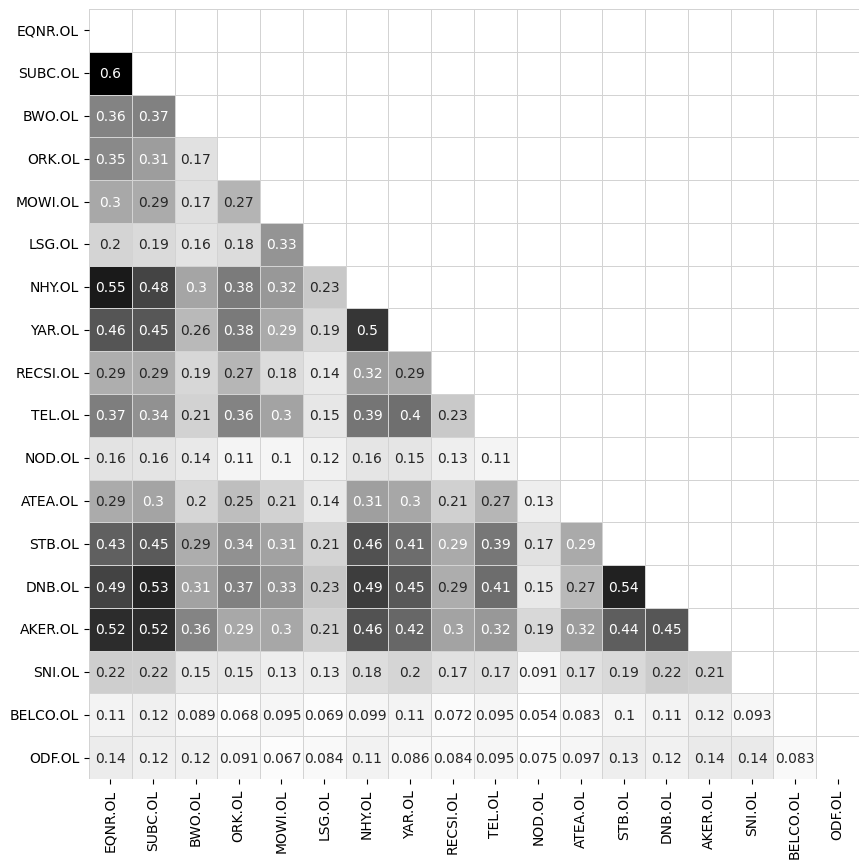

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_valid.corr(),
            mask=mask,
            annot=True,
            cmap="Greys",
            cbar=(i==2),
            square=True,
            linewidths=0.5,
            linecolor='lightgray')